In [1]:
import braitenberg_navigation as navigation
import image_utils as iutils

In [2]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [3]:
def show_left_right_gray(image_gray, img_l_gray, img_r_gray):
    f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(24, 9))

    ax0.set_title('Image', fontsize=20)
    ax1.set_title('Left', fontsize=20)
    ax2.set_title('Right', fontsize=20)

    ax0.imshow(image_gray, cmap='gray')
    ax1.imshow(img_l_gray, cmap='gray')
    ax2.imshow(img_r_gray, cmap='gray')

In [4]:
# img_lane = cv2.imread('dataSet3/image_1628786135241.jpg')
img_lane = cv2.imread('dataSet4/image_1629490720622.jpg')

(240, 320, 3)


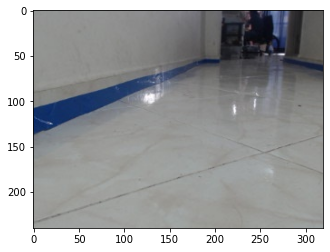

In [5]:
plt.imshow(cv2.cvtColor(img_lane, cv2.COLOR_BGR2RGB))
print(img_lane.shape)

In [6]:
(height, width) = img_lane.shape[:2]

rectange_w = 10
rectange_h = 40

# margin_horizontal = 100
margin_horizontal = 50
margin_top = 70

corners_region_l = [
    (margin_horizontal, margin_top),
    (margin_horizontal, rectange_h+margin_top),
    (margin_horizontal+rectange_w, rectange_h+margin_top),
    (margin_horizontal+rectange_w, margin_top)
]
corners_region_r = [
    (width-margin_horizontal-rectange_w, margin_top), 
    (width-margin_horizontal-rectange_w, rectange_h+margin_top),
    (width-margin_horizontal, rectange_h+margin_top),
    (width-margin_horizontal, margin_top)
]

lane_processing = navigation.Braitenberg(corners_region_l, corners_region_r, 80)

## 1. Select channel

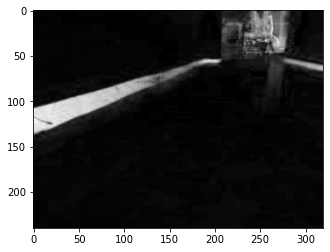

In [7]:
s_channel = lane_processing._select_channel(img_lane)
plt.imshow(s_channel, cmap='gray')
iutils.showAndSaveBR(s_channel, "01", True)

## 2.Select channel

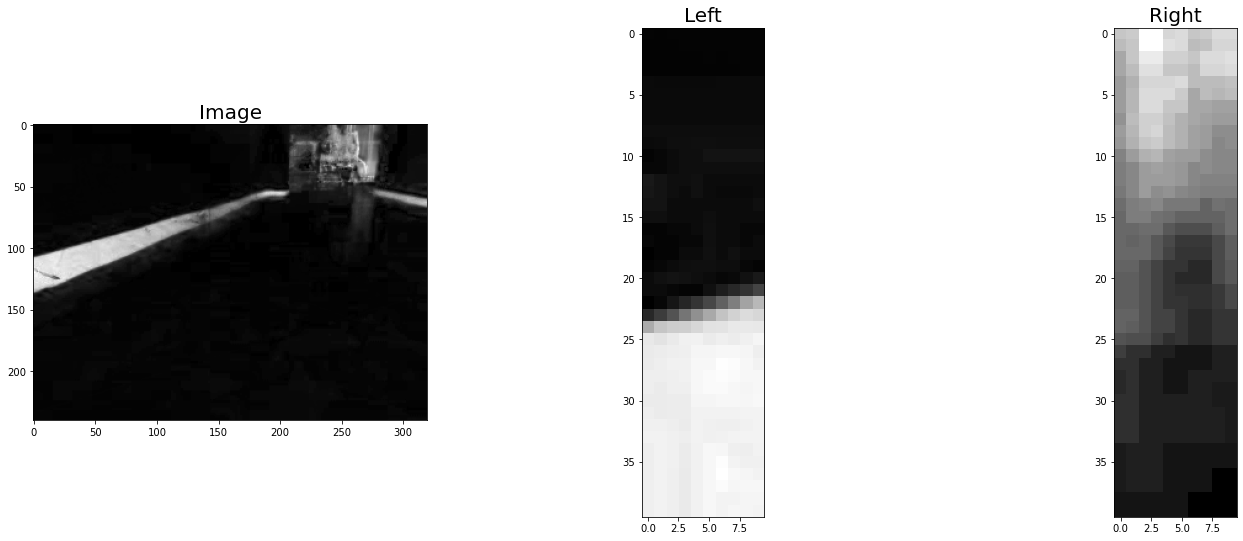

In [8]:
img_l_gray, img_r_gray = lane_processing._get_left_right_regions_gray(s_channel)
show_left_right_gray(s_channel, img_l_gray, img_r_gray)

## 3.Binary Operation

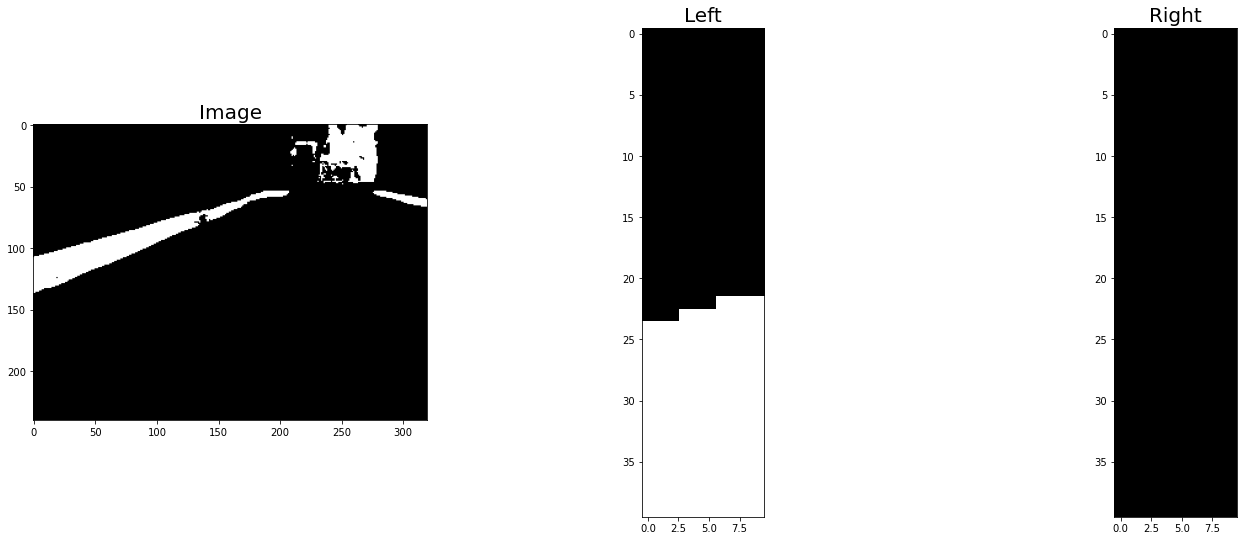

In [9]:
image_binary = lane_processing._binary(s_channel, 80, 255)
l_binary = lane_processing._binary(img_l_gray, 80, 255)
r_binary = lane_processing._binary(img_r_gray, 80, 255)

# activation_l, activation_r = lane_processing._check_both_activation(img_l_gray, img_r_gray, 80)
show_left_right_gray(image_binary, l_binary, r_binary)

# 4. Get sum of pixel for each window

In [10]:
lane_processing._check_both_activation(img_l_gray, img_r_gray, 80)

(True, False)

In [11]:
lane_processing._sense_both_pixels(img_l_gray, img_r_gray)

(171, 0)

# Test complete pipeline

In [12]:
start = time.time()
img_regions, value_l, value_r = lane_processing.process_image(img_lane)
end = time.time()
print("Processing Time: {}".format(end - start))

Processing Time: 0.0015721321105957031


In [13]:
print((value_l, value_r))

(171, 0)


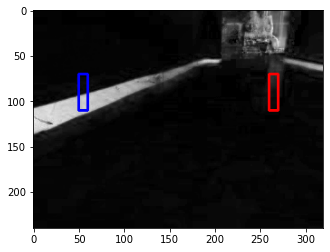

In [14]:
iutils.showAndSaveBR(img_regions, "02", True)